# Лабораторная работа №3
Выполнила Фонград Анастасия КИ21-16/1б

In [346]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, TweedieRegressor, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import warnings
from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import t
import seaborn as sns

In [347]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [348]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

## Предварительная обработка данных

In [349]:
ids = test_data["id"]
train_data.drop("id", axis=1, inplace=True)
test_data.drop("id", axis=1, inplace=True)
answer = 'Цена'

In [350]:
train_data.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


Можно увидеть, что категориальные признаки уже были закодированы. Для избежания ловушки фиктивных переменных были удалены некоторые колонки

In [351]:
train_data.drop("Без.ремонта", axis=1, inplace=True)
train_data.drop("Совмещенный.санузел", axis=1, inplace=True)
train_data.drop("Смешанные.стены", axis=1, inplace=True)
train_data.drop("Иные.перекрытия", axis=1, inplace=True)

Получим список всех числовых признаков. Числовыми будем считать признаки с более чем 5 уникальными значениями

In [352]:
numeric = []
categorical = []
for name in train_data.columns:
    if train_data[name].nunique() > 5:
        numeric.append(name)
    else:
        categorical.append(name)
numeric.remove(answer)
columns = numeric + categorical
print("Numeric features:", numeric)
print("Categorical features:", categorical)

Numeric features: ['Общая.площадь', 'Этаж', 'Этажей.в.доме', 'Год.постройки', 'Школа.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000', 'Бар.1000', 'Банк.1000', 'Аптека.1000']
Categorical features: ['Количество.комнат', 'Студия', 'Парковка', 'Дизайнерский', 'Евроремонт', 'Косметический', 'Балкон', 'Лоджия', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт', 'Мусоропровод', 'Аварийный', 'Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Парк.1000', 'Кинотеатр.1000']


Нормализуем числовые признаки

In [353]:
scaler = MinMaxScaler()
train_data[numeric] = scaler.fit_transform(train_data[numeric])
test_data[numeric] = scaler.fit_transform(test_data[numeric])
train_data.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Дизайнерский,Евроремонт,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.024752,0.101485,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.155466,0.302157,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


## Отбор информативных признаков
Построим матрицы корреляции признаков

<Axes: >

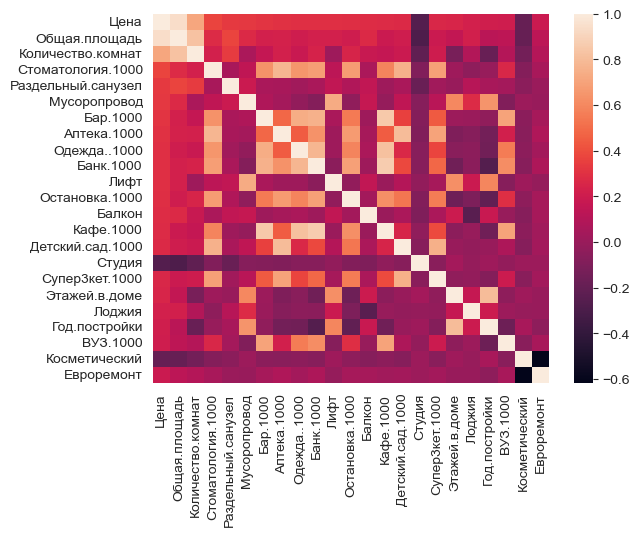

In [354]:
sorted_idx = train_data.corr()[answer].abs().sort_values(ascending=False).index[:23]
corr_matrix = train_data[sorted_idx].corr()
sns.heatmap(corr_matrix)

In [355]:
def show_correlation(names):
    corr_price_df = train_data.corr()[[answer]].transpose()[names]
    sb.heatmap(
    corr_price_df,
    annot=True,
    fmt='.1g',
    vmin=-1,
    vmax=1,
    )
    fig = plt.gcf()
    fig.set_size_inches(35, 5)

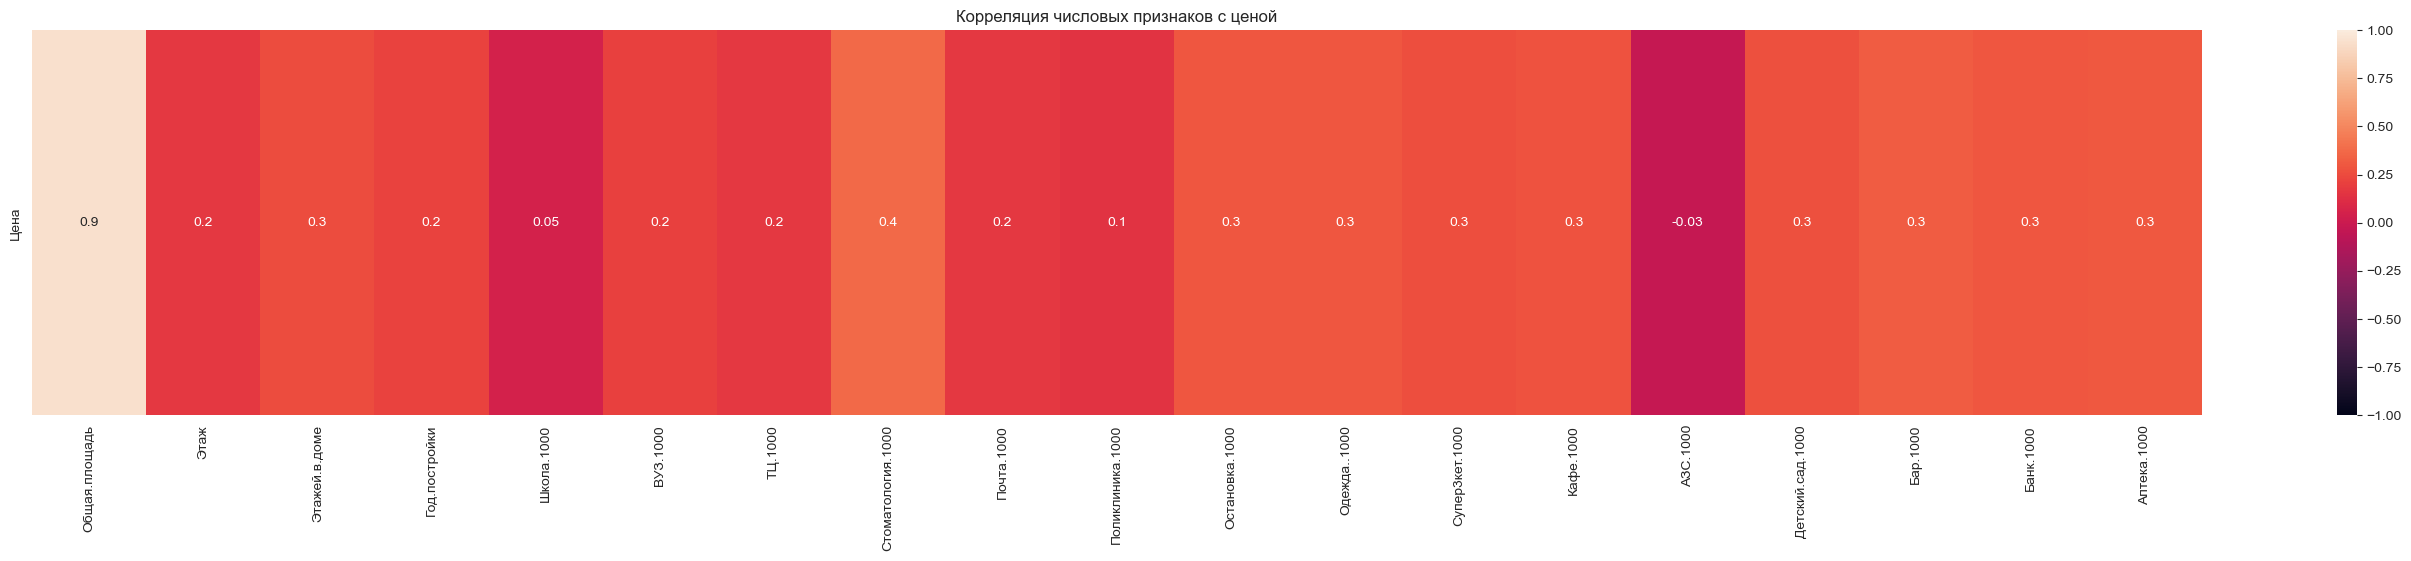

In [356]:
show_correlation(numeric)
plt.title("Корреляция числовых признаков с ценой")
plt.show()

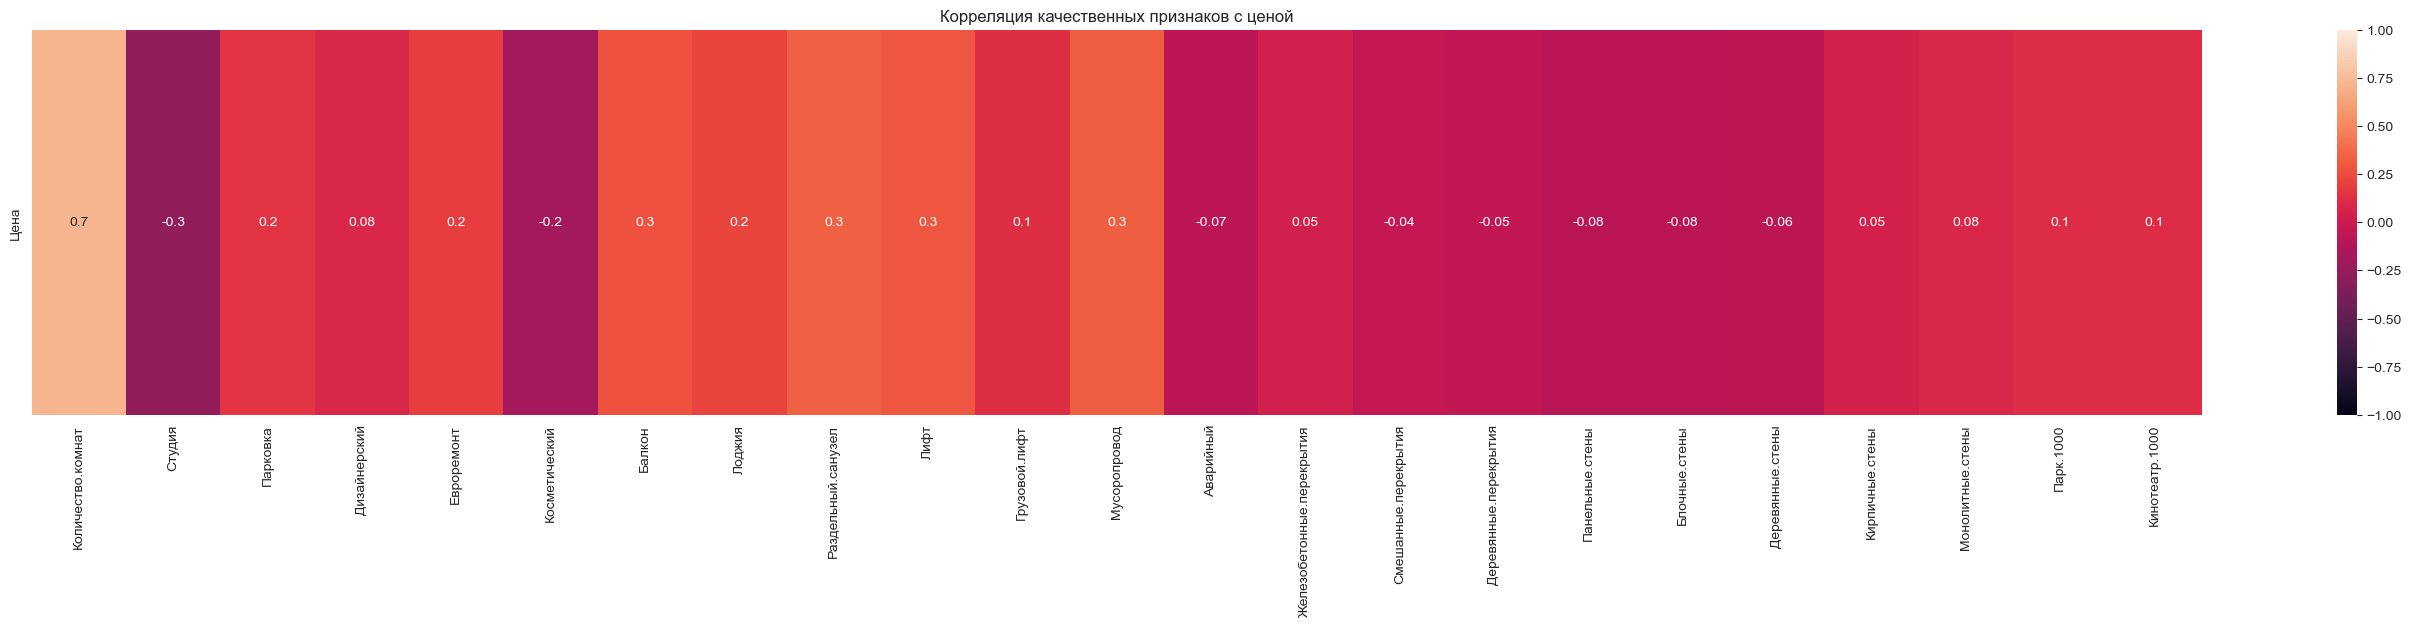

In [357]:
show_correlation(categorical)
plt.title("Корреляция качественных признаков с ценой")
plt.show()

Определим наиболее коррелирующие с ценой признаки

<Axes: >

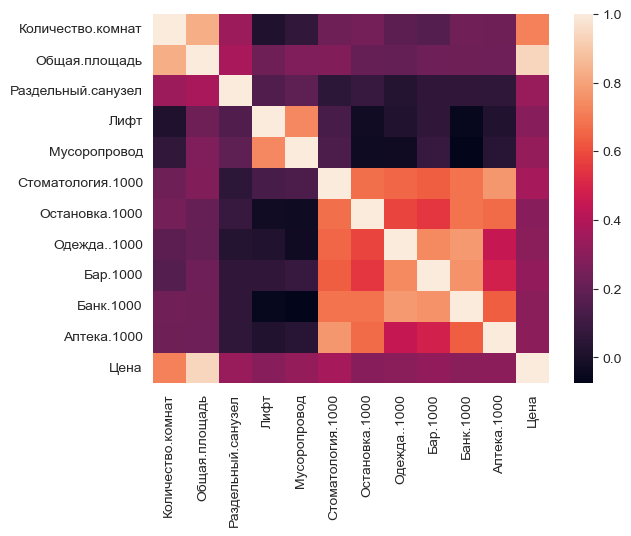

In [358]:
corr_matrix = train_data.corr()
threshold = 0.29
corr_price_matrix = train_data.corrwith(train_data[answer]).abs()
weak_corr_features = set(corr_matrix[corr_price_matrix <= threshold].index)
train_data.drop(weak_corr_features, axis=1, inplace=True)
sns.heatmap(train_data.corr())

Оставим только признаки, меньше всего коррелирующие друг с другом

<Axes: >

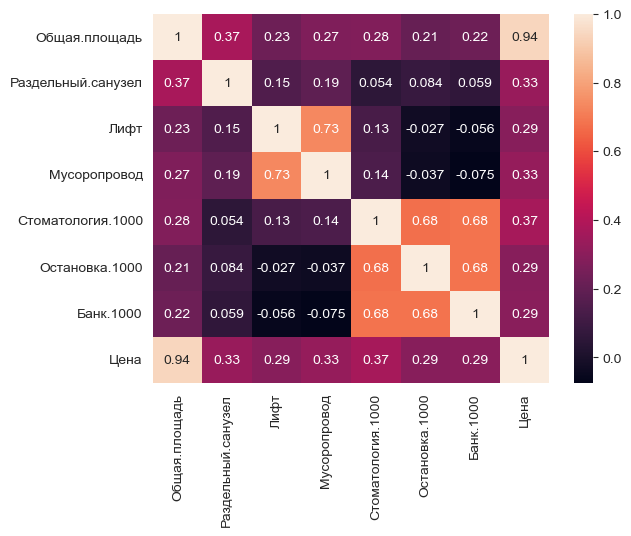

In [359]:
feature_select = train_data.drop(answer, axis=1)
corr_series = feature_select.corr().abs().stack().sort_values()
corr_series = corr_series[~corr_series.duplicated()]
threshold = 0.75
drops = set([feature2 for (feature1, feature2), corr in corr_series.items() if
             corr > threshold and corr != 1])
train_data.drop(drops, axis=1, inplace=True)
sns.heatmap(train_data.corr(), annot=True)

In [360]:
x = train_data.drop(columns=answer, axis=1)
y = train_data[answer]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

     Общая.площадь  Раздельный.санузел  Лифт  Мусоропровод  Стоматология.1000  \
0         0.327273                   0     0             0           0.189189   
1         0.314545                   0     0             0           0.135135   
2         0.390909                   0     1             1           0.216216   
3         0.490909                   0     0             0           0.405405   
4         0.211818                   0     0             1           0.054054   
..             ...                 ...   ...           ...                ...   
803       0.254545                   0     1             1           0.054054   
804       0.327273                   0     0             0           0.378378   
805       0.218182                   0     1             1           0.000000   
806       0.327273                   0     0             0           0.162162   
807       0.185455                   0     0             0           0.108108   

     Остановка.1000  Банк.1

## Построение регрессионных моделей

In [ ]:
def count_criteria(model):
    """
    Вычисляет все виды критериев для данной модели
    @:param model: модель линейной регрессии
    @:return: словарь значений критериев
    """
    y_pred = model.predict(x_test) if hasattr(model, "predict") else model.fit(x_test)[0]

    r_sq = r2_score(y_test, y_pred)

    n, m = x_test.shape
    adj_r_sq = 1 - (1 - r_sq) * (n - 1) / (n - m - 1)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    ll = -0.5 * (n * np.log(2 * np.pi) + n * np.log(
        np.sum(((y_test - y_pred) ** 2)) / n) + n)
    aic = 2 * m - 2 * ll
    bic = m * np.log(n) - 2 * ll

    res = pd.Series({
        "R^2": r_sq,
        "Adj R^2": adj_r_sq,
        "RMSE": rmse,
        "AIC": aic,
        "BIC": bic
    })
    return res

In [ ]:
def get_stats_vals(fitted_model):
    """
    Вычисляет информацию обо всех коэффициентах модели
    @:param fitted_model: модель для вычисления
    @:return: все параметры коэффициента
    """

    n, p = x_test.shape

    mse = mean_squared_error(y_test, fitted_model.predict(x_test))
    std_errs = np.sqrt(np.diag(np.linalg.inv(np.dot(x_test.T, x_test))) * mse)
    coefs = fitted_model.coef_ if hasattr(fitted_model,
                                          "coef_") else fitted_model.params.values

    t_values = coefs / std_errs
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=n - p - 1))

    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = t.ppf(1 - alpha / 2, n - p - 1)
    conf_intervals = list(
        zip(coefs - t_critical * std_errs, coefs + t_critical * std_errs))
    is_hypothesis_rejected = np.abs(t_values) > t_critical

    return pd.DataFrame(
        {
            'Name': x_test.columns,
            'Estimate': coefs,
            'Standard Error': std_errs,
            't-value': t_values,
            'p-value': p_values,
            '95% Confidence Interval': conf_intervals,
            'Is hypothesis rejected': is_hypothesis_rejected
        })

In [ ]:
def sk_get_best(unfitted_model, params):
    """
    Определяет лучшую модель с параметрами
    @:param unfitted_model: необученная модель
    @:param params: параметры для обучения модели
    @:return: модель с лучшими параметрами
    """
    grid = GridSearchCV(unfitted_model, params, cv=5,
                        scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)
    return grid.best_estimator_


def sm_get_best(unfitted_model, params):
    kfolder = KFold(n_splits=5, shuffle=True)
    param_keys = params.keys()
    fitted = []
    for param in product(*params.values()):
        param_dict = dict(zip(param_keys, param))
        for train_idx, test_idx in kfolder.split(x):
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            cur_model = unfitted_model(y_train, x_train, **param_dict)
            fitted_model = cur_model.fit()
            y_pred = fitted_model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            fitted.append({"model": fitted_model, "score": rmse})
    return min(fitted, key=lambda m_dict: m_dict["score"])["model"]

In [ ]:
def build_sk_model(model_name, model_params, list_models):
    """
    :param model_name:
    :param model_params:
    :return:
    """
    all_stats = ()
    model = model_params["model"]
    if model_params["selector"] == "SFS":
        selector = SequentialFeatureSelector(model)
        selector.fit(x_train, y_train)
        features = selector.get_support()
        x_train_sel, x_test_sel = x_train.loc[:, features], x_test.loc[:,
                                                                features]
    elif model_params["selector"] == "Poly":
        selector = PolynomialFeatures(degree=2)
        x_train_sel, x_test_sel = selector.fit_transform(
            x_train), selector.fit_transform(x_test)
    else:
        x_train_sel, x_test_sel = x_train, x_test
    fitted_model = sk_get_best(model, model_params["params"], x_train_sel,
                                   y_train)
    model_stats = count_criteria(fitted_model, x_test_sel, y_test)
    model_stats["Model name"] = model_name
    all_stats = all_stats.append(model_stats, ignore_index=True)
    if model_params["selector"] != "Poly":
        display(model_name,
                get_stats_vals(fitted_model, x_test_sel, y_test))


In [ ]:
def build_sm_model(cur_model_name, cur_model_params, list_models):
        all_stats = ()
        fitted_model = sm_get_best(cur_model_params["model"], cur_model_params["params"])
        model_stats = count_criteria(fitted_model)
        model_stats["Model name"] = cur_model_name
        all_stats = all_stats.append(model_stats, ignore_index=True)
        display(cur_model_name,
                get_stats_vals(fitted_model))

In [ ]:
def aic(len_data_frame: int, mse: float, num_params: int) -> float:
    """Вычисление информационного критерия Акаике."""
    return 2 * num_params + len_data_frame * log(mse)


def bic(len_data_frame: int, mse: float, num_params: int) -> float:
    """Вычисление байесовского информационного критерия."""
    return num_params * log(len_data_frame) + len_data_frame * log(mse)

def search_info(
    model,
    name_model: str,
    params: dict,
    list_models=[],
) -> None:
    """Поиск подходящих параметров и вывод информации о модели."""
    gs = GridSearchCV(
        model,
        params,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error",
    )
    result = gs.fit(x_train, y_train)
    # print(result.summary())
    best_model = gs.best_estimator_
    print(f"Модель: {best_model}")
    y_pred = best_model.predict(x_test)
    rmse_value = mean_squared_error(y_test, y_pred, squared=False)
    try:
        num_params = len(best_model.coef_) + 1
    except:
        num_params = len(train_data)
    r2_value = r2_score(y_test, y_pred)
    aic_value = aic(
        len(y_test),
        mean_squared_error(y_test, y_pred, squared=True),
        num_params,
    )
    bic_value = bic(
        len(y_test),
        mean_squared_error(y_test, y_pred, squared=True),
        num_params,
    )
    print(f'RMSE: {rmse_value}')
    print(f'Score == R2: {r2_value}')
    print(f"BIC: {bic_value}")
    print(f"AIC: {aic_value}")
    list_models.append(
        [name_model, best_model, rmse_value, r2_value, bic_value, aic_value]
    )

### Линейная регрессия

In [362]:
list_models = []
linear_parameters = {}
search_info(
    LinearRegression(),
    "Линейная регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: LinearRegression()
RMSE: 324152.4088610701
Score == R2: 0.8918529809760676
BIC: 6210.783465345991
AIC: 6182.838973799267


### Лассо регрессия

In [363]:
search_info(
    Lasso(),
    "Лассо регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: Lasso()
RMSE: 324152.3305957297
Score == R2: 0.891853033199417
BIC: 6210.783348003164
AIC: 6182.838856456439


### Гребневая регрессия

In [364]:
search_info(
    Ridge(),
    "Гребневая регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: Ridge()
RMSE: 331847.79263738246
Score == R2: 0.8866572063754112
BIC: 6222.18629136267
AIC: 6194.241799815945


### Elastic-Net

In [365]:
search_info(
    ElasticNet(alpha=1, l1_ratio=1),
    "Elastic-Net",
    linear_parameters,
    list_models=list_models
)

Модель: ElasticNet(alpha=1, l1_ratio=1)
RMSE: 324152.3305957297
Score == R2: 0.891853033199417
BIC: 6210.783348003164
AIC: 6182.838856456439


### Метод наименьших углов

In [366]:
search_info(
    Lars(),
    "Метод наименьших углов",
    linear_parameters,
    list_models=list_models
)

Модель: Lars()
RMSE: 358030.3404341647
Score == R2: 0.8680663099707269
BIC: 6259.093775188153
AIC: 6231.149283641428


### Обобщённая линейная регрессия
Обобщенная линейная регрессия (обобщенный МНК) - это метод, который расширяет линейную регрессию на случаи, когда зависимая переменная имеет не нормальное распределение или связана с независимыми переменными нелинейно.

In [367]:
search_info(
    TweedieRegressor(power=1, alpha=0.5, link='log'),
    "Обобщённая линейная регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: TweedieRegressor(alpha=0.5, link='log', power=1)
RMSE: 381830.1073798339
Score == R2: 0.8499429564629857
BIC: 6290.371778727245
AIC: 6262.427287180521


### Полиномиальная регрессия
Зависимость между независимой переменной x и зависимой переменной y моделируется как полином n-й степени в x. Полиномиальная регрессия может быть использована для аппроксимации нелинейных данных и изучения сложных и изогнутых зависимостей.

In [368]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
search_info(
    model,
    "Полиномиальная регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])
RMSE: 351228.02142336307
Score == R2: 0.8730319759894001
BIC: 10644.220435872281
AIC: 7821.826789653119


### Взвешенный МНК
Дает разные веса наблюдениям в зависимости от их точности или важности. Минимизирует сумму взвешенных квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [369]:
X = sm.add_constant(x)
wls_model = sm.WLS(y,x)
results = wls_model.fit()

#result
print(results.summary())
results.predict

                                 WLS Regression Results                                
Dep. Variable:                   Цена   R-squared (uncentered):                   0.984
Model:                            WLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7013.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                        0.00
Time:                        08:50:45   Log-Likelihood:                         -11504.
No. Observations:                 808   AIC:                                  2.302e+04
Df Residuals:                     801   BIC:                                  2.306e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

<bound method Results.predict of <statsmodels.regression.linear_model.RegressionResults object at 0x00000144605D77F0>>

### Байесовская регрессия

In [370]:
#X = sm.add_constant(x)
bs_model = sm.BayesGaussMI(x, y)
results = wls_model.fit()
print(results.summary())
results.predict

                                 WLS Regression Results                                
Dep. Variable:                   Цена   R-squared (uncentered):                   0.984
Model:                            WLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7013.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                        0.00
Time:                        08:50:45   Log-Likelihood:                         -11504.
No. Observations:                 808   AIC:                                  2.302e+04
Df Residuals:                     801   BIC:                                  2.306e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

<bound method Results.predict of <statsmodels.regression.linear_model.RegressionResults object at 0x0000014467CBA3E0>>

Вывод коэффициентов регрессионной модели

In [371]:
reg = BayesianRidge()
reg.fit(x, y)
reg.coef_

array([1.29022541e-04, 1.30741388e-04, 1.25886197e-04, 1.24095729e-04,
       5.09950378e-05, 4.10351065e-05, 3.85737341e-05])

### Непараметрическая регрессия

In [372]:
search_info(
    KNeighborsRegressor(),
    "Непараметрическая регрессия",
    linear_parameters,
    list_models=list_models
)

Модель: KNeighborsRegressor()
RMSE: 533253.3957254057
Score == R2: 0.7073265643116332
BIC: 10847.155120305782
AIC: 8024.761474086619


## Сравнение регрессионных моделей

In [373]:
def compare_models(lst_models: list, index: int, param: dict) -> None:
    """Построение графиков для сравнения моделей."""
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(
        list(map(lambda x: x[0], lst_models)),
        list(map(lambda x: x[index], lst_models)),
        )
    ax.bar_label(
        ax.containers[0],
        label_type='edge',
        padding=3,
        fontsize=18,
    )
    plt.ylabel('Value', fontsize=18)
    plt.title(param, fontsize=18)
    plt.xticks(fontsize=14, rotation=90)
    plt.show()

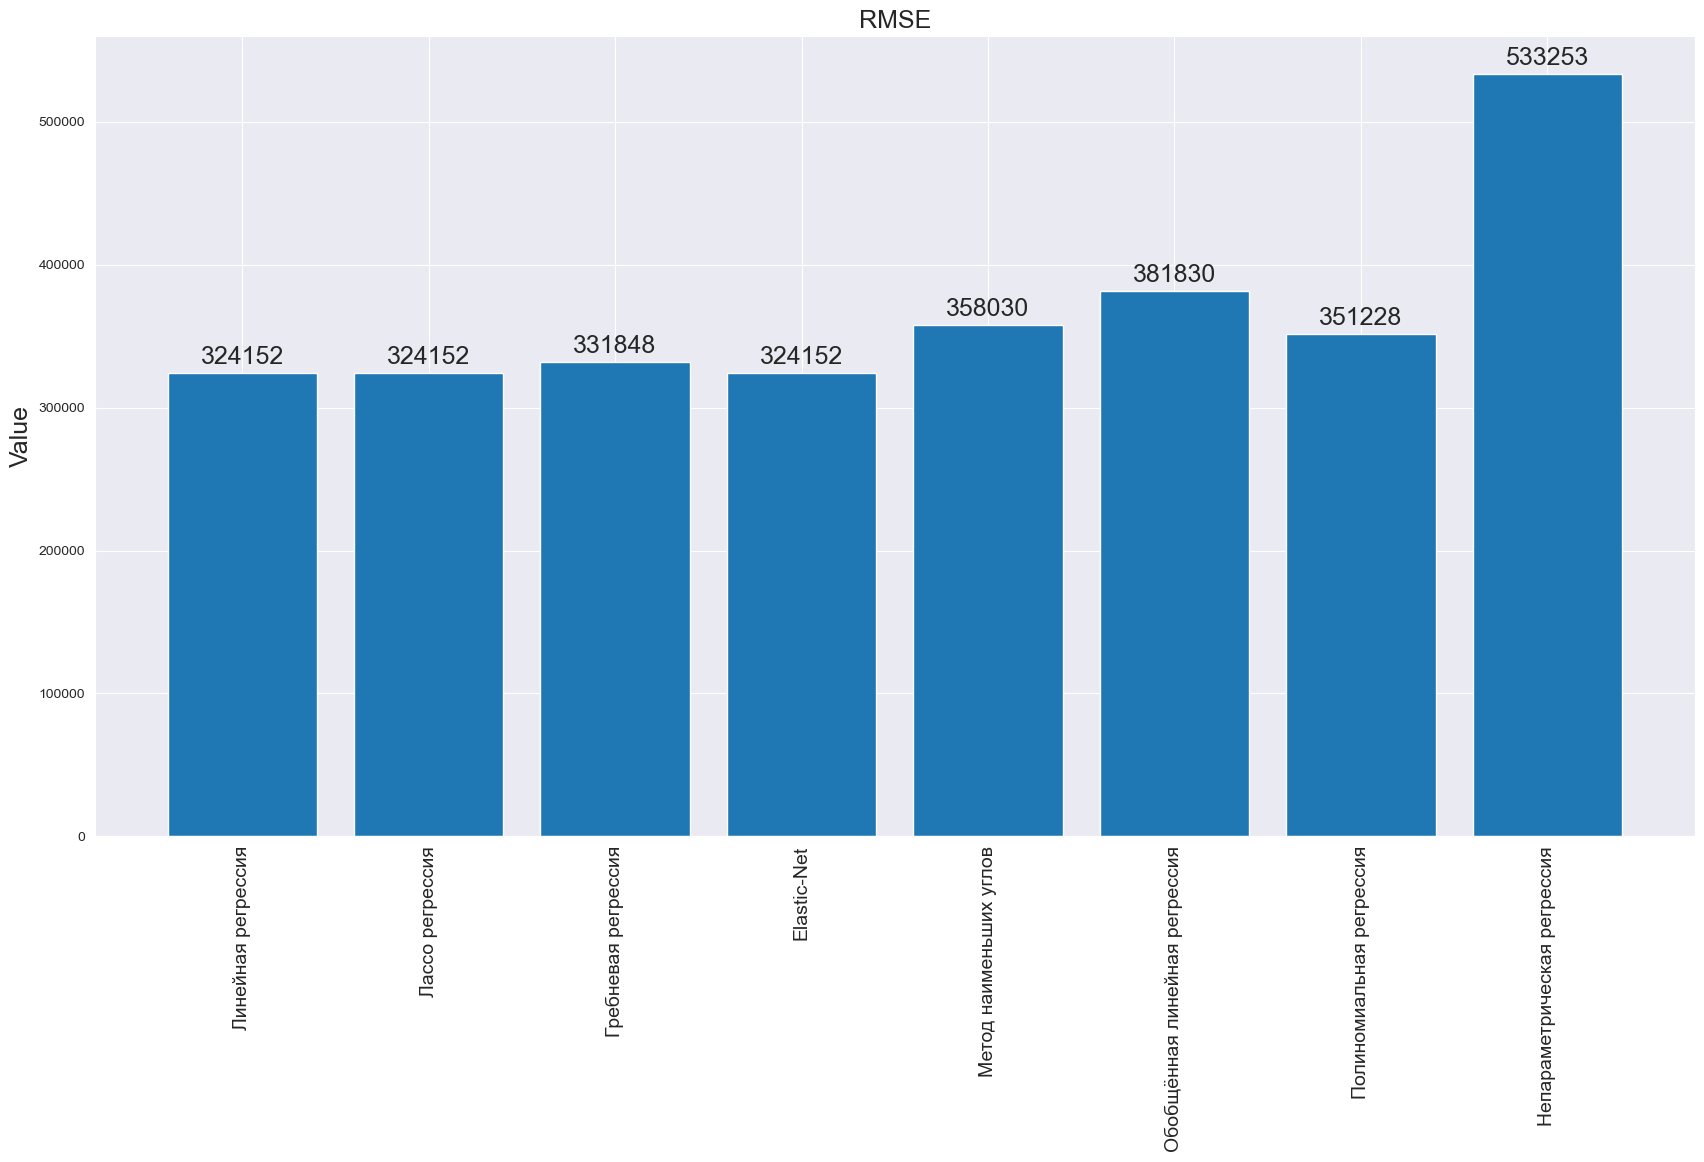

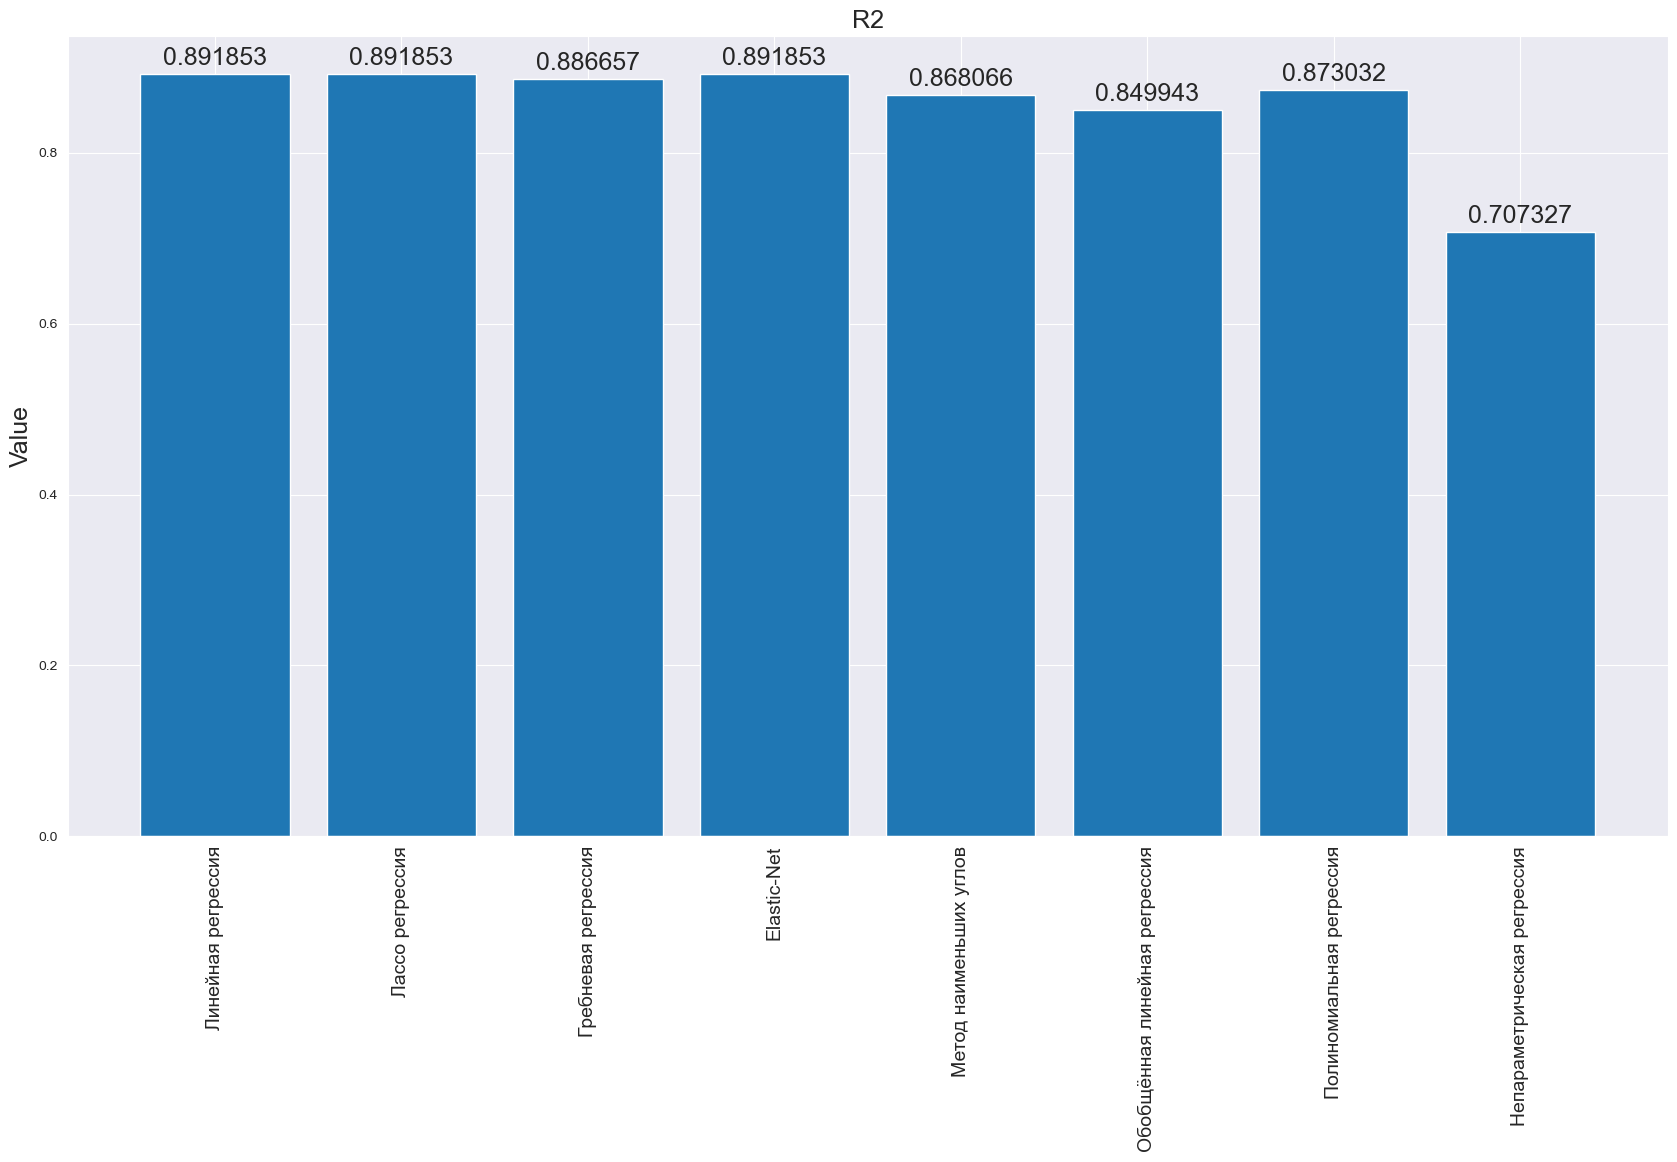

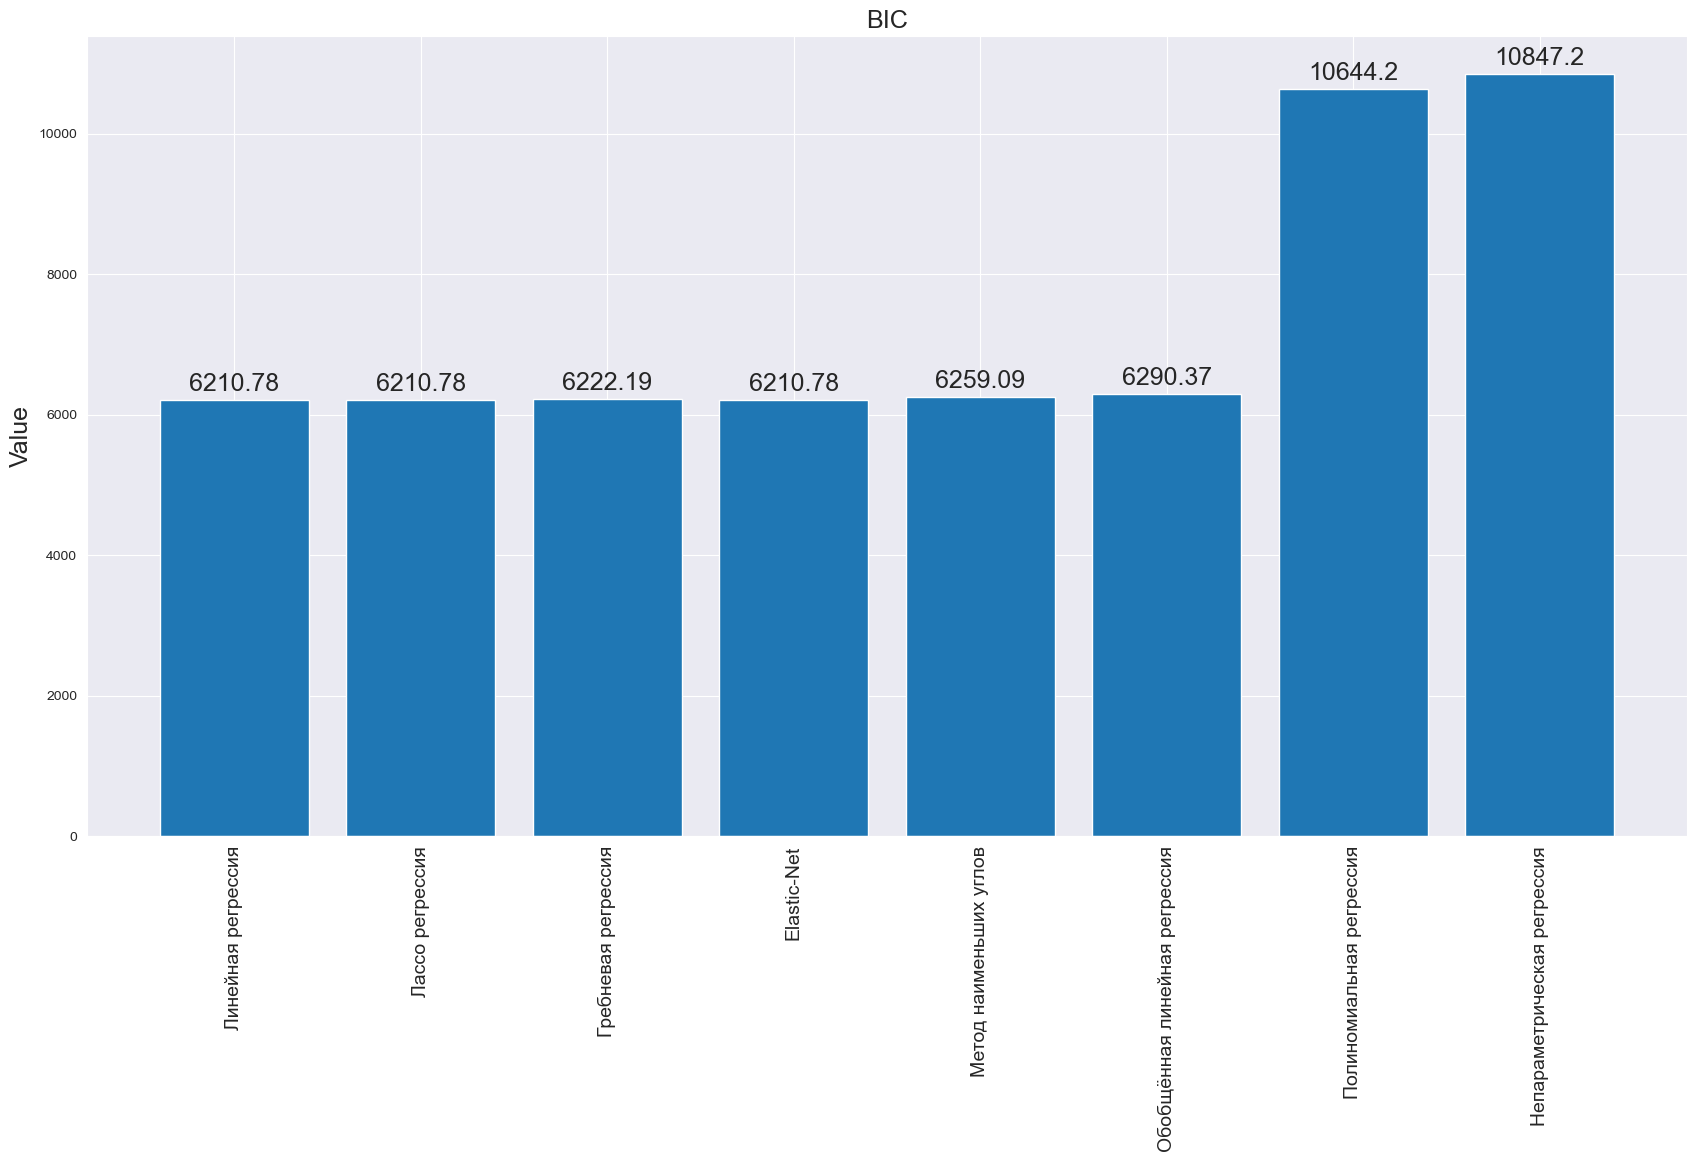

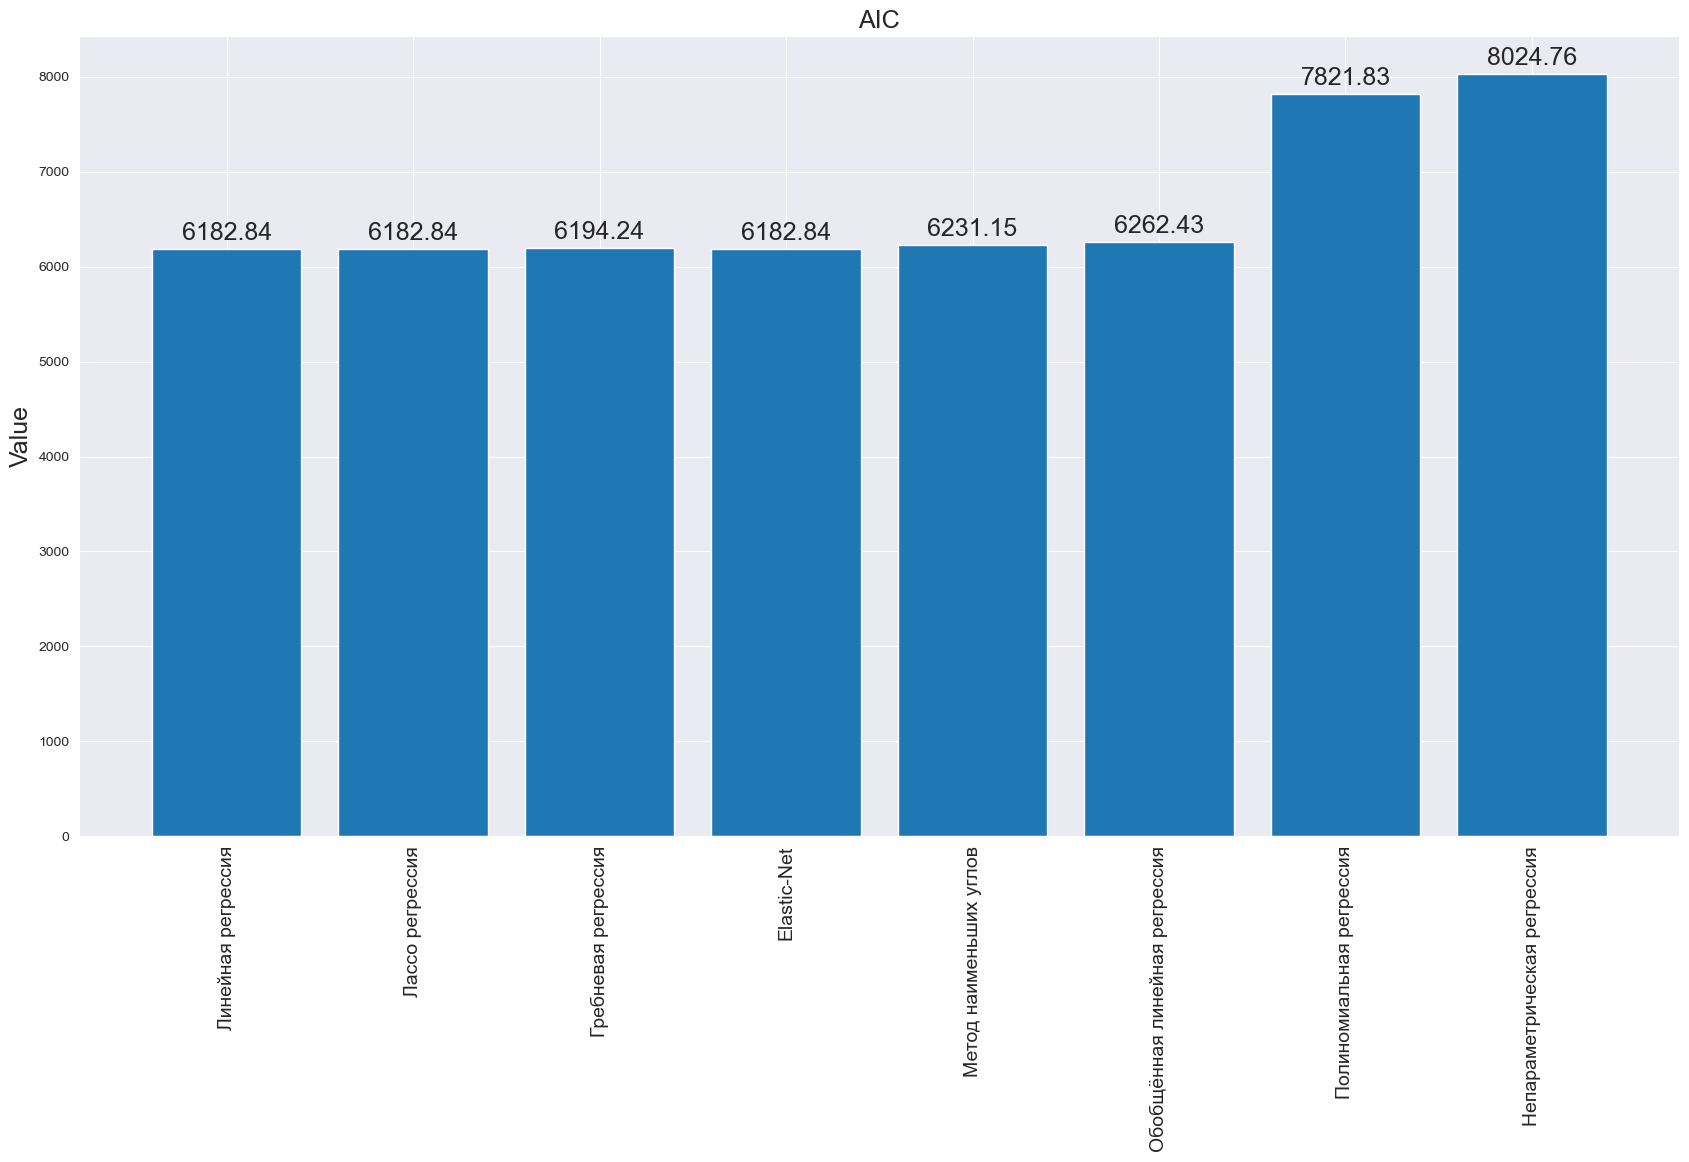

In [374]:
list_criterions = ["RMSE", "R2", "BIC", "AIC"]
for criterion in list_criterions:
    compare_models(
        list_models,
        list_criterions.index(criterion) + 2,
        criterion,
    )

In [375]:
def create_submission(id_col, y_pred) -> pd.DataFrame:
    """Создание итоговой выборки."""
    submission = pd.DataFrame({
        "id": id_col,
        "Цена": y_pred,
    })
    return submission

In [376]:
y_test_predicted = list_models[0][1].predict(test_data)
sub = create_submission(
    ids,
    list(item for item in y_test_predicted.tolist()),
)
sub.to_csv("../data/sub.csv", index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- АЗС.1000
- Аварийный
- Аптека.1000
- Балкон
- Бар.1000
- ...
